# Heart Failure Prediction

# Introduction
Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.

The term “heart disease” is often used interchangeably with the term “cardiovascular disease”. Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease.

# Import Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from collections import Counter
import pylab
from scipy.stats import norm, skew, boxcox
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, plot_confusion_matrix, auc

# Read Data and explore it

In [38]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Attribute Information:
Thirteen (13) clinical features:

* age: age of the patient (years)
* anaemia: decrease of red blood cells or hemoglobin (boolean)
* high blood pressure: if the patient has hypertension (boolean)
* creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
* diabetes: if the patient has diabetes (boolean)
* ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
* platelets: platelets in the blood (kiloplatelets/mL)
* sex: woman or man (binary)
* serum creatinine: level of serum creatinine in the blood (mg/dL)
* serum sodium: level of serum sodium in the blood (mEq/L)
* smoking: if the patient smokes or not (boolean)
* time: follow-up period (days)
* [target] death event: if the patient deceased during the follow-up period (boolean)

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [7]:
df.shape

(299, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Observations:** No null values

In [20]:
def plot_hist(variable):
    print('min {}:{}'.format(variable, min(df[variable])))
    print('max {}:{}'.format(variable, max(df[variable])))
    
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    plt.hist(df[variable], color = 'orange')
    plt.xlabel(variable)
    plt.ylabel('Freq')
    plt.title("{} distribution with hist".format(variable))
    
    plt.subplot(1,3,2)
    sns.distplot(df[variable], fit = norm)
    plt.title("{} distribution with Distplot".format(variable))
    
    plt.subplot(1,3,3)
    stats.probplot(df[variable], dist = 'norm', plot = pylab)
    plt.title("{} distribution with Q-Q plot".format(variable))
    plt.show()

In [12]:
df.select_dtypes(exclude='object').columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [16]:
for col in list(df.columns):
    print(col, df[col].nunique())

age 47
anaemia 2
creatinine_phosphokinase 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
DEATH_EVENT 2


anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT were the categorical columns which were then transformed into numerical

In [18]:
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
cols = list(df.columns)
num_cols = [col for col in cols if col not in cat_cols]
print(num_cols)

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


min age:40.0
max age:95.0


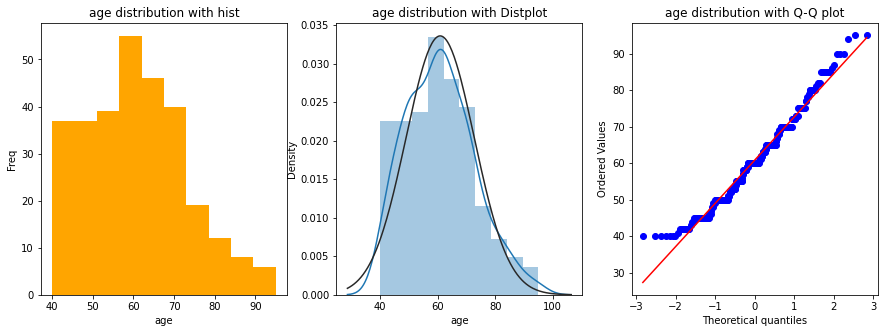

min creatinine_phosphokinase:23
max creatinine_phosphokinase:7861


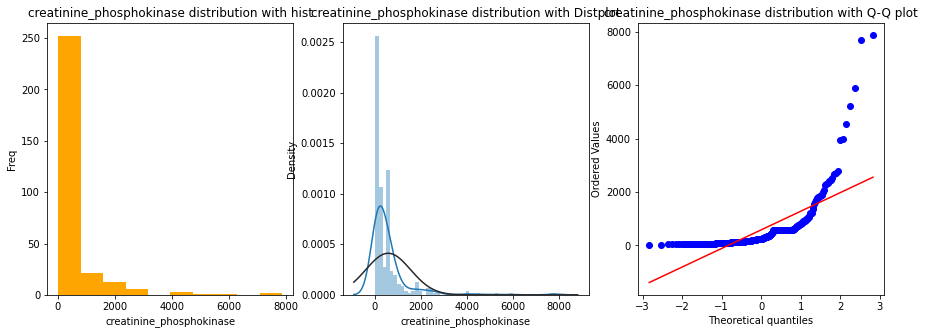

min ejection_fraction:14
max ejection_fraction:80


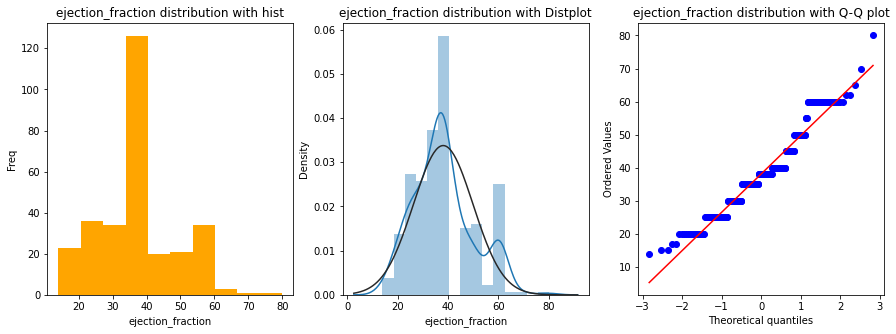

min platelets:25100.0
max platelets:850000.0


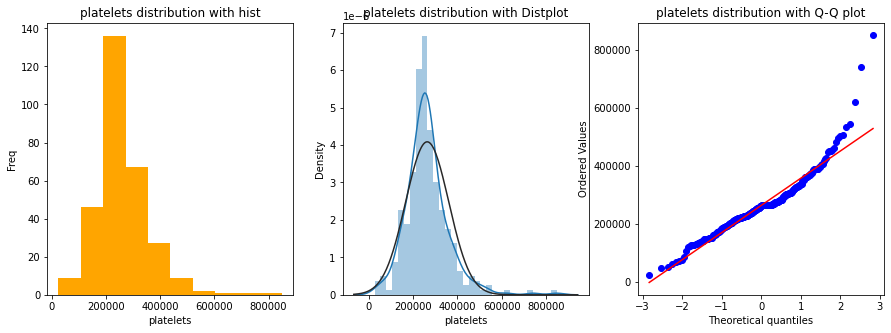

min serum_creatinine:0.5
max serum_creatinine:9.4


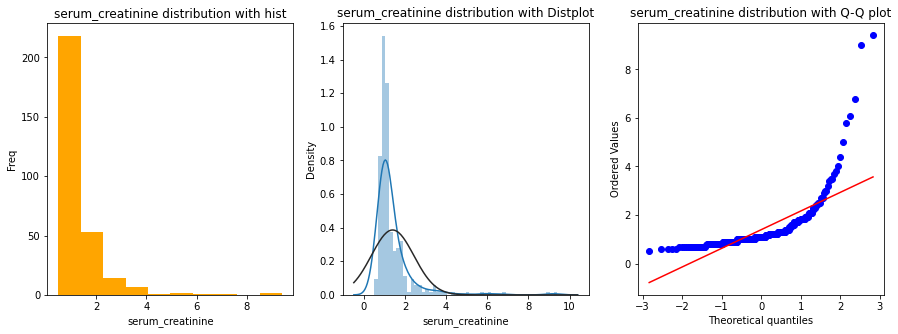

min serum_sodium:113
max serum_sodium:148


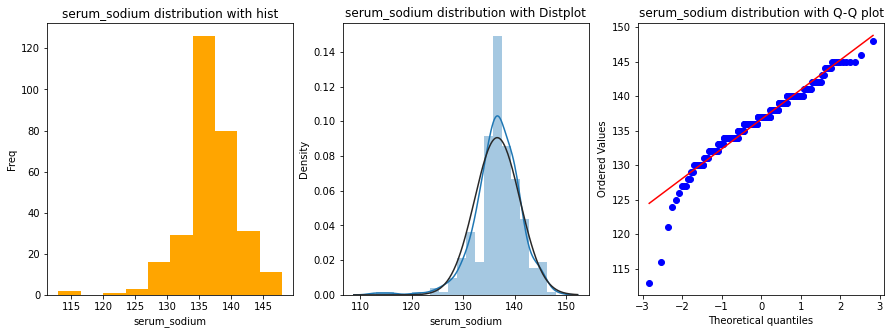

min time:4
max time:285


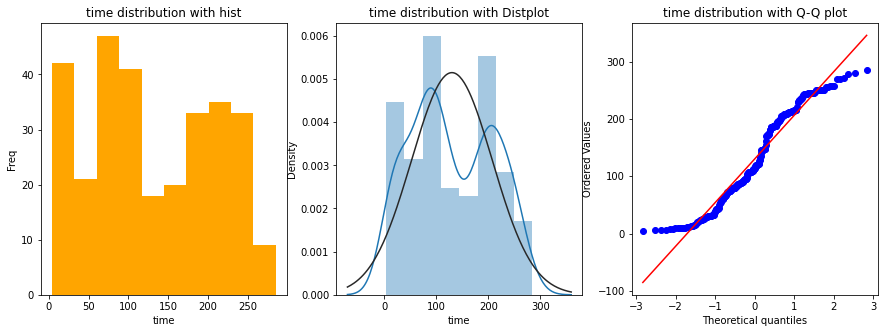

In [21]:
# plot for numerical cols
for col in num_cols:
    plot_hist(col)

In [26]:
# plot for categorical cols
def bar_plot(variable):
    var = df[variable]
    var_value = var.value_counts()
    
    plt.figure(figsize = (6,3))
    plt.bar(var_value.index, var_value, linewidth = 2)
    plt.xticks(var_value.index, var_value.index.values)
    plt.ylabel('Freq')
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, var_value))

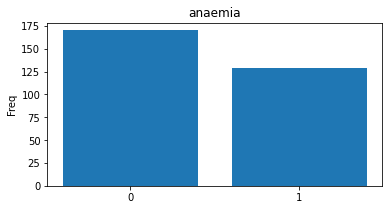

anaemia: 
0    170
1    129
Name: anaemia, dtype: int64


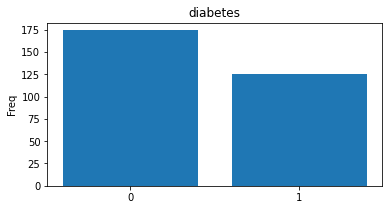

diabetes: 
0    174
1    125
Name: diabetes, dtype: int64


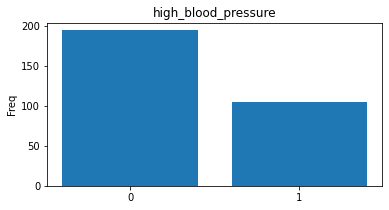

high_blood_pressure: 
0    194
1    105
Name: high_blood_pressure, dtype: int64


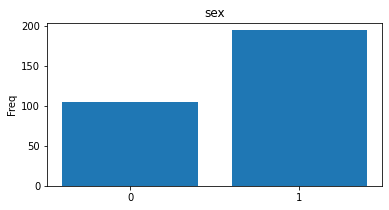

sex: 
1    194
0    105
Name: sex, dtype: int64


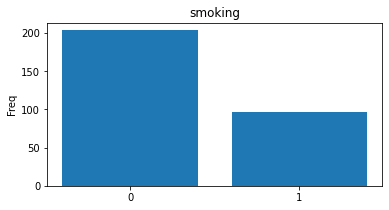

smoking: 
0    203
1     96
Name: smoking, dtype: int64


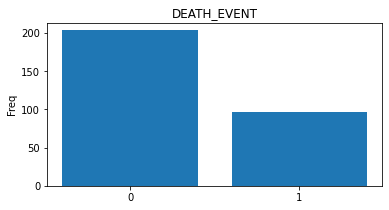

DEATH_EVENT: 
0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [27]:
for col in cat_cols:
    bar_plot(col)

# Outlier Detection

In [35]:
def detect_oultier(df, features):
    outlier_ind = []
    
    for col in features:
        # 1st quartile
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile 
        Q3 = np.percentile(df[col], 75)
        
        IQR= Q3-Q1
        
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[col]< Q1 - outlier_step) | (df[col]>Q3 + outlier_step)].index
        
        print(col, len(outlier_list_col))
        outlier_ind.extend(outlier_list_col)
    outlier_ind = Counter(outlier_ind)
    multiple_outliers = list(i for i, v in outlier_ind.items() if v >1)
    
    return multiple_outliers
        

In [36]:
df.loc[detect_oultier(df, num_cols)]

age 0
creatinine_phosphokinase 29
ejection_fraction 2
platelets 21
serum_creatinine 29
serum_sodium 4
time 0


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Remove Outliers


In [39]:
df1 = df.drop(detect_oultier(df, num_cols), axis = 0).reset_index(drop = True)

age 0
creatinine_phosphokinase 29
ejection_fraction 2
platelets 21
serum_creatinine 29
serum_sodium 4
time 0


In [40]:
df.shape, df1.shape

((299, 13), (289, 13))

# Feature Engineering
**Skewness** : Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. In simple terms, it is how much a variable deviates from the normal distribution.

There are two types.

* Right Skewed or Positive Skewed
* Left Skewed or Negative Skewed

**Right Skewed or Positive Skewed -->** The distribution has a rightward tail with respect to the normal distribution.

**Left Skewed or Negative Skewed -->** The distribution has a tail to the left relative to the normal distribution.

Why is it important? The model has difficulty in estimating the correct value at other points while focusing on the dense point while predicting on data that does not show a normal distribution.

What do we do, we will look at our skewness values.

* If it is **greater than 1**, there is **positive skewness**,
* if it is **less than -1**, there is **negative skewness**.

In [41]:
skewed_cols = df.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_cols, columns = ['skewed'])
skewness

,skewed
creatinine_phosphokinase,4.440689
serum_creatinine,4.433610
platelets,1.454975
DEATH_EVENT,0.766479
smoking,0.766479
high_blood_pressure,0.623583
ejection_fraction,0.552593
age,0.420937
diabetes,0.332251
anaemia,0.276863


## Positive skewed columns

In [64]:
skewness[skewness['skewed'] >1]

,skewed
creatinine_phosphokinase,4.440689
serum_creatinine,4.433610
platelets,1.454975


**Observation** There are 3 columns with positive skewness

## Negative skewed columns

In [44]:
skewness[skewness['skewed'] <-1]

,skewed
serum_sodium,-1.04287


**Observation** There is no column having negative skewness

## Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

* logarithmic transformation
* reciprocal transformation
* square root transformation
* exponential transformation (more general, you can use any exponent)
* boxcox transformation

In [61]:
df_copy = df.copy(deep = True)

In [66]:
def plot_data(data, feature):
    plt.figure(figsize = (10,5))
    
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.title(feature)
    
    plt.subplot(1,2,2)
    stats.probplot(data[feature], dist = 'norm', plot= pylab)
    plt.title(feature)
    plt.show()

## Logarithmic Transformation

skewed features are transformed Logarithimically to convert it into normal distribution

In [47]:
before_Trans = []
log_trans = []

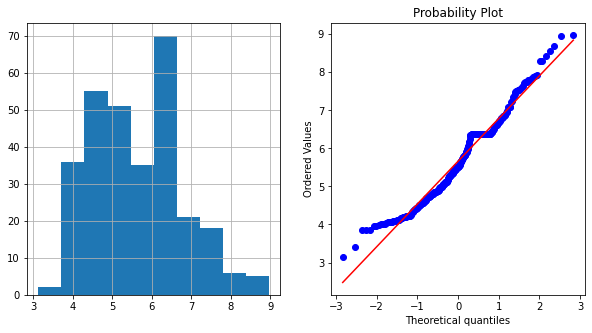

In [50]:
# creatinine_phosphokinase
df_copy['creatinine_phosphokinase_log'] = np.log(df_copy['creatinine_phosphokinase'])
plot_data(df_copy, 'creatinine_phosphokinase_log')

In [51]:
before_Trans.append(df_copy['creatinine_phosphokinase'].skew())
log_trans.append(df_copy['creatinine_phosphokinase_log'].skew())

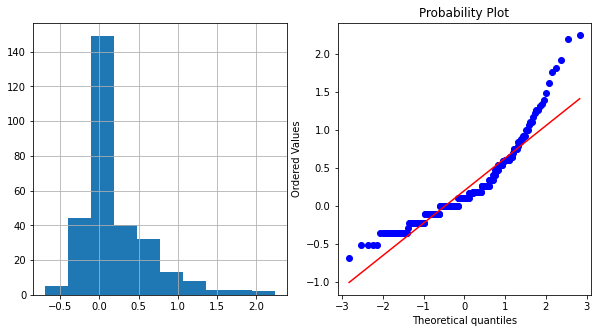

In [52]:
# serum_creatinine
df_copy['serum_creatinine_log']= np.log(df_copy['serum_creatinine'])
plot_data(df_copy, 'serum_creatinine_log')

In [53]:
before_Trans.append(df_copy['serum_creatinine'].skew())
log_trans.append(df_copy['serum_creatinine_log'].skew())

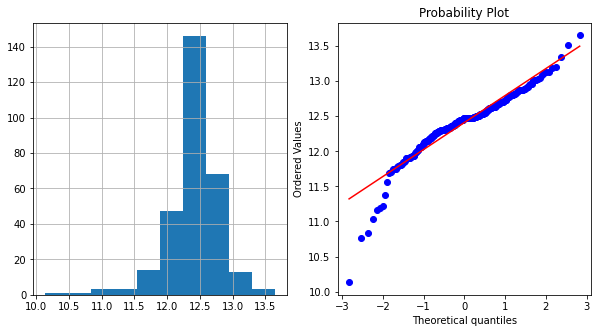

In [54]:
# platelets
df_copy['platelets_log']= np.log(df_copy['platelets'])
plot_data(df_copy, 'platelets_log')

In [55]:
before_Trans.append(df_copy['platelets'].skew())
log_trans.append(df_copy['platelets_log'].skew())

In [72]:
def transformation(trans, data, feature_list):
    before_trans=[]
    after_trans=[]
    for col in feature_list:
        before_trans.append(data[col].skew())
        if trans =='log':
            data[col+'_log'] = np.log(data[col])
            after_trans.append(data[col+'_log'].skew())
            plot_data(data, col +'_log' )
        elif trans == 'reciprocal':
            data[col+'_reciprocal'] = 1/(data[col])
            after_trans.append(data[col+'_reciprocal'].skew())
            plot_data(data, col +'_reciprocal' )
        elif trans == 'sqrt':
            data[col+'_sqrt'] = data[col]**0.5
            after_trans.append(data[col+'_sqrt'].skew())
            plot_data(data, col +'_sqrt' )
        elif trans == 'exp':
            data[col+'_exp'] = (data[col] **(1/1.2))
            after_trans.append(data[col+'_exp'].skew())
            plot_data(data, col +'_exp' )
        elif trans == 'boxcox':
            data[col+'_boxcox'], _ = stats.boxcox(data[col])
            after_trans.append(data[col+'_boxcox'].skew())
            plot_data(data, col +'_boxcox' )
            
    return before_trans, after_trans
        
        

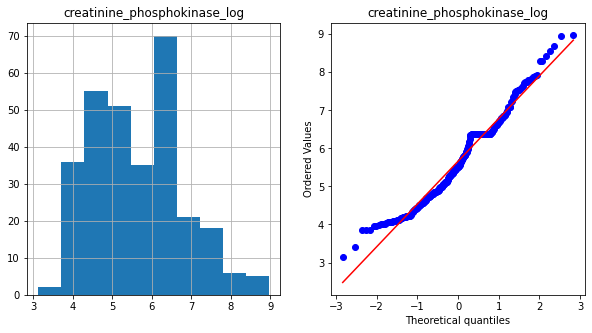

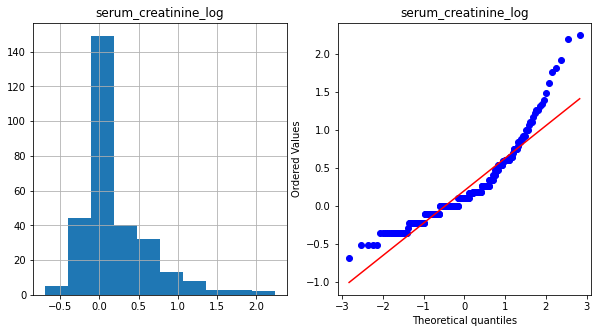

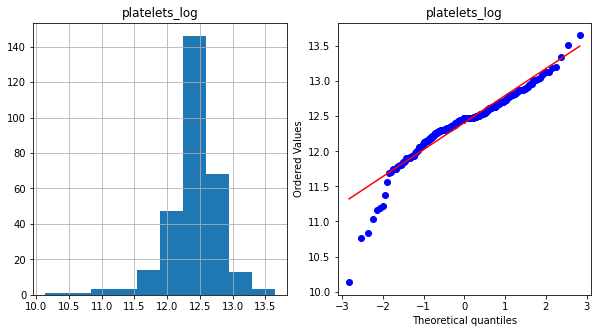

In [68]:
skewed_cols = ['creatinine_phosphokinase', 'serum_creatinine', 'platelets']
before_trans, log_trans = transformation('log',df_copy, skewed_cols )

## Reciprocal Transformations

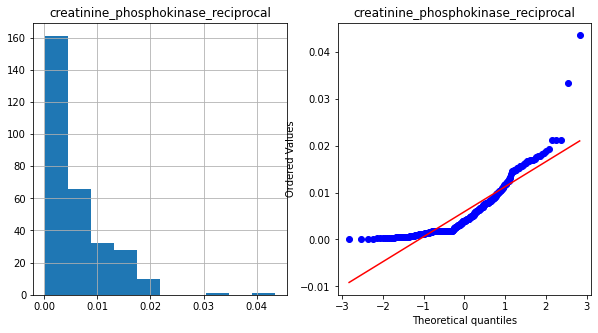

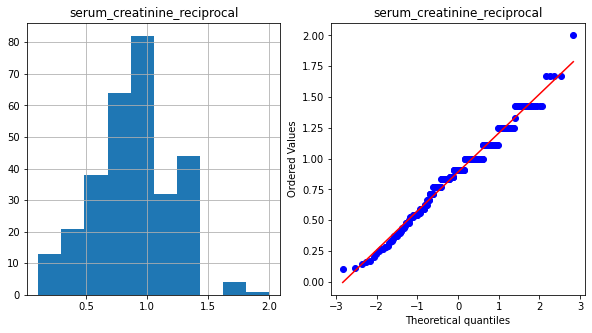

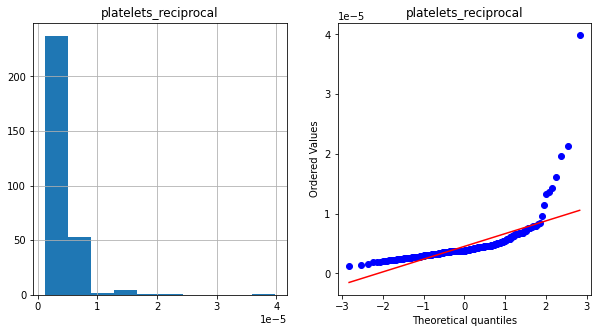

In [69]:
before_trans, recip_trans = transformation('reciprocal',df_copy, skewed_cols )

## Squareroot Transformation

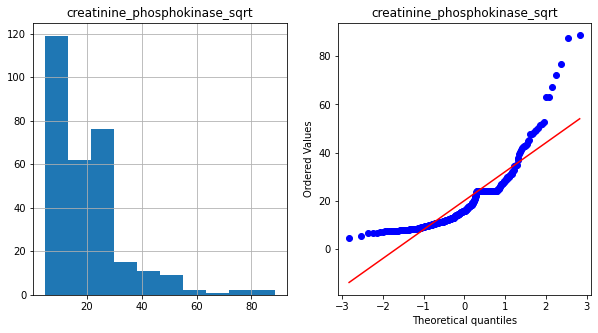

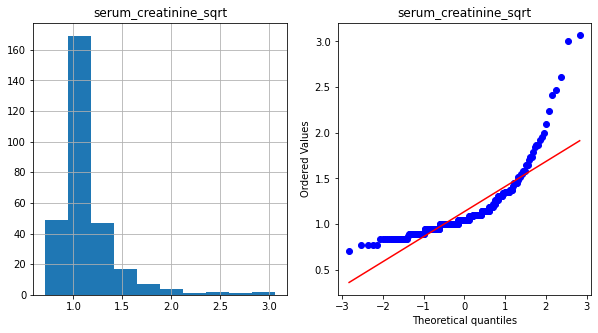

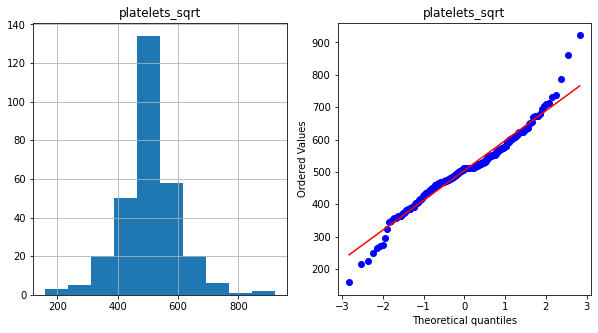

In [70]:
before_trans, sqrt_trans = transformation('sqrt',df_copy, skewed_cols)

## Exponential Transformation

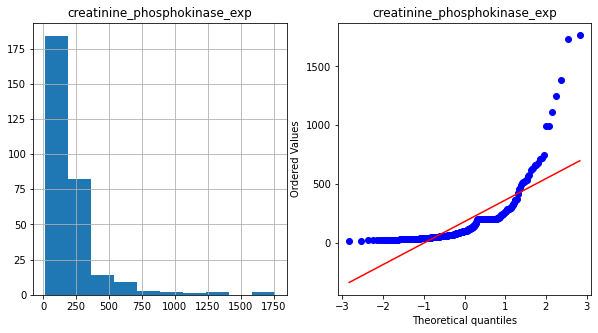

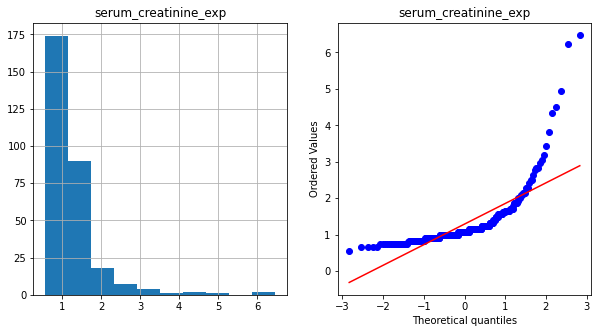

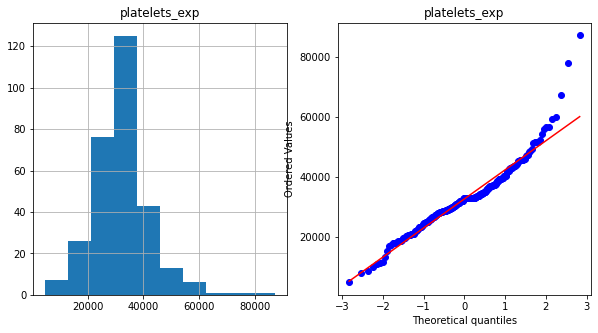

In [73]:
before_trans, exp_trans = transformation('exp',df_copy, skewed_cols )

## BoxCox Transformation

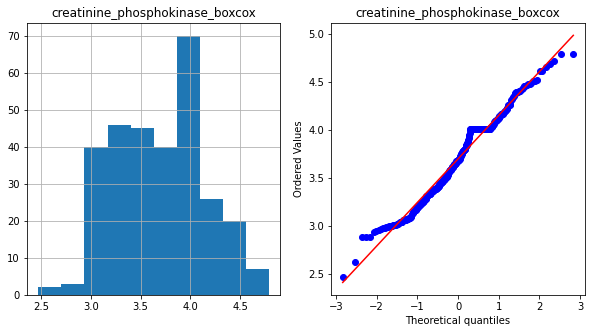

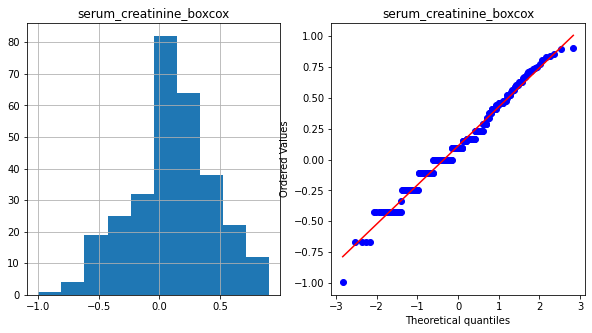

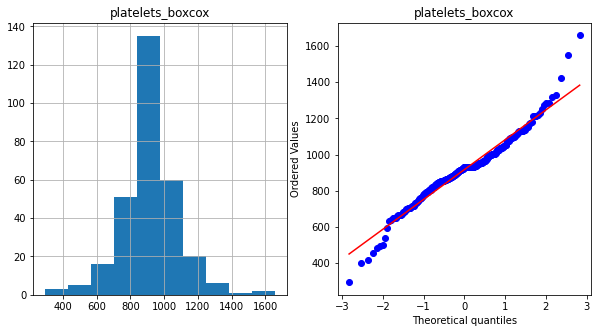

In [74]:
before_trans, boxcox_trans = transformation('boxcox',df_copy, skewed_cols )

In [78]:
df_copy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,platelets_reciprocal,creatinine_phosphokinase_sqrt,serum_creatinine_sqrt,platelets_sqrt,creatinine_phosphokinase_exp,serum_creatinine_exp,platelets_exp,creatinine_phosphokinase_boxcox,serum_creatinine_boxcox,platelets_boxcox
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,...,0.000004,24.124676,1.378405,514.781507,201.419952,1.707240,33065.231038,4.011877,0.475058,935.540540
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,...,0.000004,88.662281,1.048809,513.184207,1762.915503,1.082665,32894.412741,4.790978,0.090952,932.683294
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,...,0.000006,12.083046,1.140175,402.492236,63.624939,1.244379,21941.307912,3.447415,0.231062,734.259071
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,...,0.000005,10.535654,1.378405,458.257569,50.633251,1.707240,27238.472273,3.320114,0.475058,834.330337
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,...,0.000003,12.649111,1.643168,571.839138,68.669938,2.288073,39396.392949,3.488730,0.632279,1037.504702


In [76]:
results = pd.DataFrame({'features': skewed_cols,
                       'before_trans': before_trans,
                       'log_trans': log_trans,
                       'reciprocal transformation': recip_trans,
                       'square root trans': sqrt_trans,
                        'exponential trans': exp_trans,
                        'boxcox trans': boxcox_trans
                       })
display(results.T)

,0,1,2
features,creatinine_phosphokinase,serum_creatinine,platelets
before_trans,4.46311,4.455996,1.462321
log_trans,0.414007,1.58399,-1.284954
reciprocal transformation,1.899927,-0.008482,6.758131
square root trans,2.107327,2.821052,0.17868
exponential trans,3.658676,3.876137,1.030808
boxcox trans,0.042638,0.021353,0.155363


**Observation** Boxcox transformation give best results

In [77]:
def boxcox(df, feature_list):
    for col in feature_list:
        df[str(col)+'_boxcox'], parameters = stats.boxcox(df[col])
        plot_data(df, str(col)+'_boxcox')

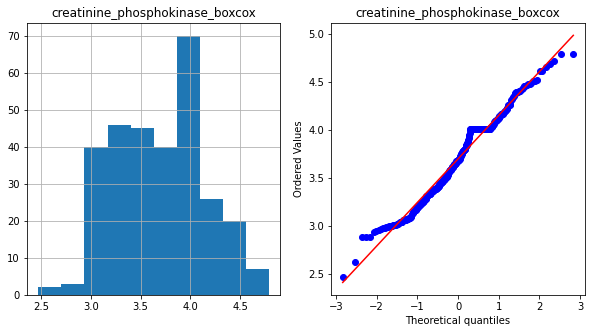

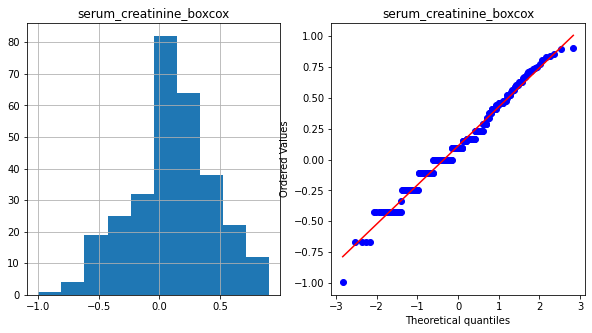

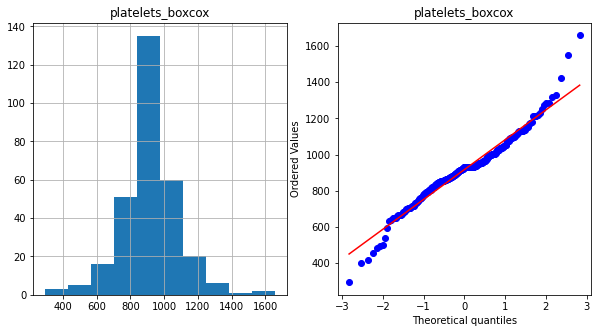

In [79]:
boxcox(df, skewed_cols)

In [80]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase_boxcox,serum_creatinine_boxcox,platelets_boxcox
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4.011877,0.475058,935.540540
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,4.790978,0.090952,932.683294
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3.447415,0.231062,734.259071
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,3.320114,0.475058,834.330337
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,3.488730,0.632279,1037.504702


In [81]:
df.shape

(299, 16)

### Drop the skewed columns

In [82]:
df=df.drop(skewed_cols, axis=1)
df.shape

(299, 13)

## Split the data 

In [83]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Classifiers

In [95]:
def clf_model(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train) # train the model
    
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test) # test and get the predictions
    
    cm = confusion_matrix(y_test, y_pred)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred)
    
    print(f"Confusion Metrix: ", cm)
    print(f"Train accuracy: ", train_acc*100)
    print(f"Test accuracy: ", test_acc*100)
    
    return train_acc, test_acc

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [97]:
train_acc_lr, test_acc_lr = clf_model(LogisticRegression(), X_train, X_test, y_train, y_test)

Confusion Metrix:  [[42  2]
 [15 16]]
Train accuracy:  88.83928571428571
Test accuracy:  77.33333333333333


In [98]:
train_acc_svc, test_acc_svc = clf_model(SVC(), X_train, X_test, y_train, y_test)

Confusion Metrix:  [[44  0]
 [31  0]]
Train accuracy:  71.42857142857143
Test accuracy:  58.666666666666664


In [99]:
train_acc_rf, test_acc_rf = clf_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Confusion Metrix:  [[39  5]
 [14 17]]
Train accuracy:  100.0
Test accuracy:  74.66666666666667


In [103]:
results = {'Train_acc': [train_acc_lr, train_acc_svc, train_acc_rf],
          'Test_acc': [test_acc_lr, test_acc_svc, test_acc_rf]}
acc_results = pd.DataFrame(results, index=['Logistic Regression', 'svc', 'rf'])
# acc_results.reset_index = ['Logistic Regression', 'svc', 'rf']

In [105]:
acc_results['diff'] = acc_results['Train_acc']-acc_results['Test_acc']

In [106]:
acc_results

,Train_acc,Test_acc,diff
Logistic Regression,0.888393,0.773333,0.115060
svc,0.714286,0.586667,0.127619
rf,1.000000,0.746667,0.253333


### Random Forest has lowest Bias but maximum Variance, However Logistic Regression is a lowest variance and considerable bias, Thus Logistic Regression is on of the best model in this case.